In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
import random
import cv2
from random import shuffle
from PIL import Image, ImageEnhance

In [3]:
def image_generator(files, batch_size = 1, sz = (512,512)):
  
  while True: 
    
    #extract a random batch 
    batch = np.random.choice(files, size = batch_size)    
    
    #variables for collecting batches of inputs and outputs 
    batch_x = []
    batch_y = []
    
    
    for f in batch:

        #get the masks. Note that masks are png files 
        mask = Image.open(f'rle_image_dataset_1_crop/{f[:-4]}.png')
        raw=mask.resize(sz)
#         print(raw.shape)
        raw1=raw.rotate(-90)
        raw2=raw.rotate(90)
        raw3=raw.rotate(20)
        raw4=raw.rotate(-20)
        raw5= raw.transpose(Image.FLIP_LEFT_RIGHT)

        enhancer = ImageEnhance.Brightness(raw)
        factor = 1.2 #gives original image
        raw6 = enhancer.enhance(factor)


        raw = np.array(raw)
#         print(raw.shape)
        raw[raw >= 1] = 1

        batch_y.append(raw)

        raw1 = np.array(raw1)
        raw2 = np.array(raw2)
        raw3 = np.array(raw3)
        raw4 = np.array(raw4)
        raw5 = np.array(raw5)
        raw6 = np.array(raw6)

        raw1[raw1 >= 1] = 1
        raw2[raw2 >= 1] = 1
        raw3[raw3 >= 1] = 1
        raw4[raw4 >= 1] = 1
        raw5[raw5 >= 1] = 1
        raw6[raw6 >= 1] = 1
#         print(f'raw shape {raw6.shape}')
        batch_y.append(raw1)
        batch_y.append(raw2)
        batch_y.append(raw3)
        batch_y.append(raw4)
        batch_y.append(raw5)
        batch_y.append(raw6)

        # #preprocess the mask 
        
        
        

        #preprocess the raw images 
        raw = Image.open(f'dataset_1_crop/{f}')
        raw = raw.resize(sz)
        raw1=raw.rotate(-90)
        raw2=raw.rotate(90)
        raw3=raw.rotate(20)
        raw4=raw.rotate(-20)
        raw5= raw.transpose(Image.FLIP_LEFT_RIGHT)

        enhancer = ImageEnhance.Brightness(raw)
        factor = 1.2 #gives original image
        raw6 = enhancer.enhance(factor)

        # raw = np.array(raw)
        batch_x.append(np.array(raw))
        batch_x.append(np.array(raw1))
        batch_x.append(np.array(raw2))
        batch_x.append(np.array(raw3))
        batch_x.append(np.array(raw4))
        batch_x.append(np.array(raw5))
        batch_x.append(np.array(raw6))


        

    #preprocess a batch of images and masks 
    batch_x = np.array(batch_x)/255.
    batch_y = np.array(batch_y)
    batch_y = np.expand_dims(batch_y,3)

    yield (batch_x, batch_y)      
    

In [4]:
batch_size = 1
sz=(256,256)

all_files = os.listdir('dataset_1_crop/')
shuffle(all_files)

split = int(0.95 * len(all_files))

#split into training and testing
train_files = all_files[0:split]
test_files  = all_files[split:]

train_generator = image_generator(train_files, batch_size = batch_size,sz=sz)
test_generator  = image_generator(test_files, batch_size = batch_size,sz=sz)

In [5]:
x, y= next(train_generator)

In [6]:
x.shape

(7, 256, 256, 3)

In [7]:
y.shape

(7, 256, 256, 1)

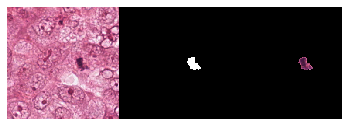

In [8]:
plt.axis('off')
img = x[0]
msk = y[0].squeeze()
msk = np.stack((msk,)*3, axis=-1)

plt.imshow( np.concatenate([img, msk, img*msk], axis = 1))